In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from pandas.tseries.offsets import Week, Hour, Minute

from convert_to_time_series import TimeSeriesData


%matplotlib inline
plt.style.use('ggplot')

In [2]:
path = '../data/lemon_haze_18.csv'
path2 = '../data/0009_gorilla_glue_4.csv'
path3 = '../data/0017_blue_cheese.csv'

In [3]:
lemon_haze = TimeSeriesData(path)
gorilla_glue = TimeSeriesData(path2)
blue_cheese = TimeSeriesData(path3)

In [4]:
%time lemon_haze.construct_tables()

CPU times: user 139 ms, sys: 49.4 ms, total: 188 ms
Wall time: 558 ms


In [5]:
%time gorilla_glue.construct_tables()

CPU times: user 92.5 ms, sys: 9.8 ms, total: 102 ms
Wall time: 100 ms


In [6]:
%time blue_cheese.construct_tables()

CPU times: user 126 ms, sys: 20.9 ms, total: 147 ms
Wall time: 149 ms


In [7]:
raw = lemon_haze.raw_df
inv = lemon_haze.by_inv_id
ts = lemon_haze.time_series
sales_dy = lemon_haze.sales_daily
sales_wk = lemon_haze.sales_weekly
gross_dy = lemon_haze.gross_daily
gross_wk = lemon_haze.gross_weekly

In [8]:
ts.head()

,ttl_sales,ttl_gross_profit
2014-07-17,120.945312,78.757812
2014-07-18,120.945312,78.757812
2014-07-19,354.418997,249.073602
2014-07-20,354.418997,249.073602
2014-07-21,354.418997,249.073602


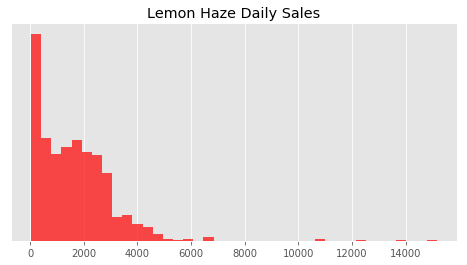

In [9]:
sales_dy.hist(bins=40, color='red', figsize=(8, 4), alpha=0.7)
plt.title('Lemon Haze Daily Sales')
plt.yticks([])
plt.show()

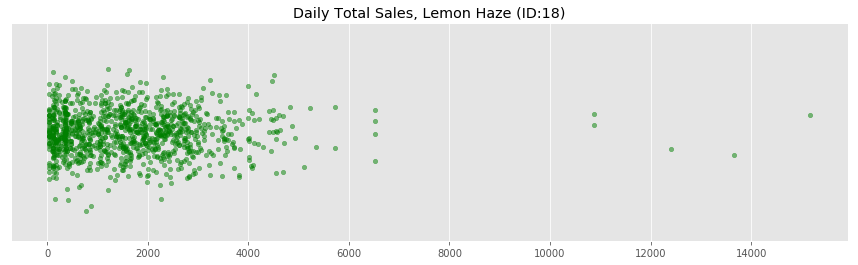

In [10]:
plt.figure(figsize=(15,4))
# plt.hist(ts['ttl_sales'], bins=30, color='green', alpha=0.8)
y = np.random.normal(0, 0.2, len(ts['ttl_sales']))
plt.scatter(ts['ttl_sales'], y, color='green', alpha=0.5, s=20)
plt.ylim(-1, 1)
plt.yticks([])
plt.title('Daily Total Sales, Lemon Haze (ID:18)')
plt.show()

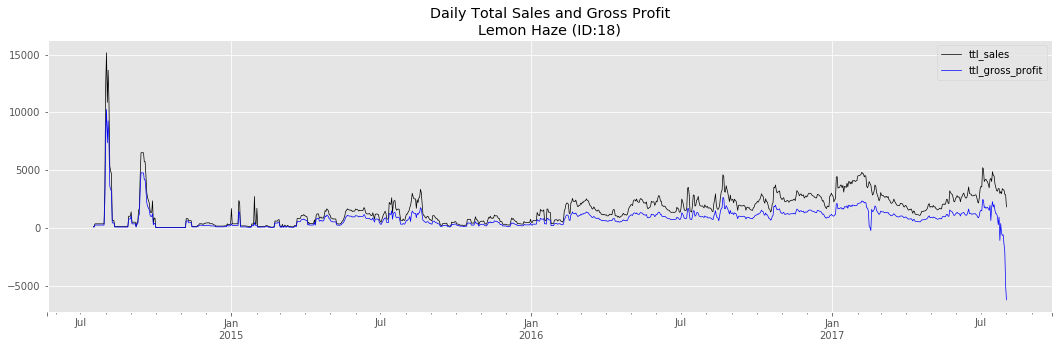

In [11]:
fig, ax = plt.subplots(figsize=(18,5))

sales_dy.plot(color='black', lw=0.7)
gross_dy.plot(color='blue', lw=0.7)
plt.legend()
plt.title('Daily Total Sales and Gross Profit\nLemon Haze (ID:18)')
plt.show()

In [12]:
week_index = pd.period_range(ts.index.min(), ts.index.max(), freq='W-MON')

Aggregate daily values into weekly sums

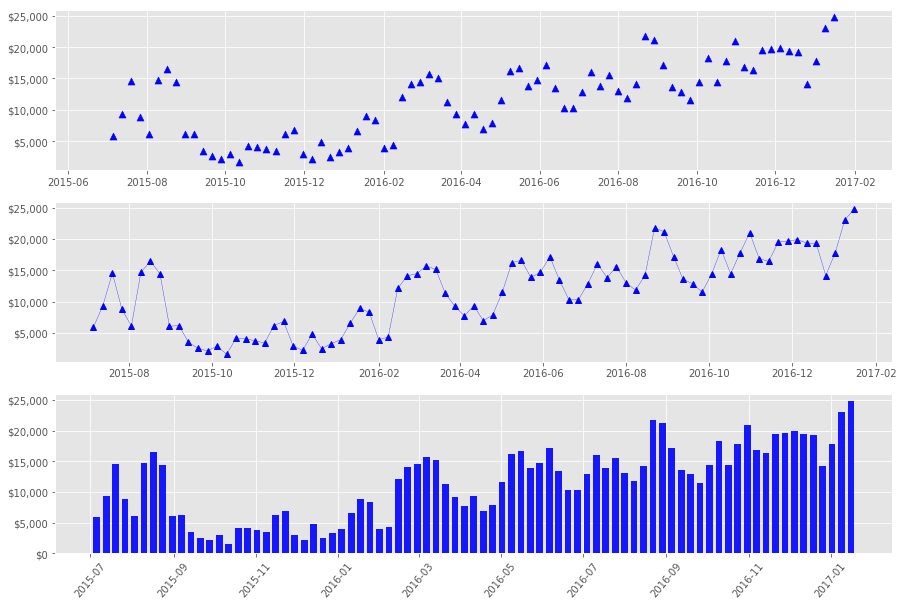

In [13]:
fig, axs = plt.subplots(3, figsize=(15,10))

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

axs[0].scatter(sales_wk.index[50:131].to_pydatetime(), sales_wk[50:131], marker='^', c='blue', s=50)
axs[0].yaxis.set_major_formatter(tick)
# axs[0].xaxis.set_

axs[1].plot(sales_wk.index[50:131].to_pydatetime(), sales_wk[50:131], marker='^', color='blue', lw=0.3)
axs[1].yaxis.set_major_formatter(tick)
plt.xticks(rotation=50)

axs[2].bar(sales_wk.index[50:131].to_pydatetime(), sales_wk[50:131], width=5, color='blue', alpha=0.9)
axs[2].yaxis.set_major_formatter(tick)
plt.xticks(rotation=50)
plt.show()

In [14]:
x = sales_wk[-107:-3] # 104 weeks of data
index = pd.to_datetime(sales_wk.index[-107:-3])
tick_period = pd.date_range(x.index.min(), x.index.max(), freq='QS-JAN')
tick_period_labels = tick_period.strftime('%Y-%b')

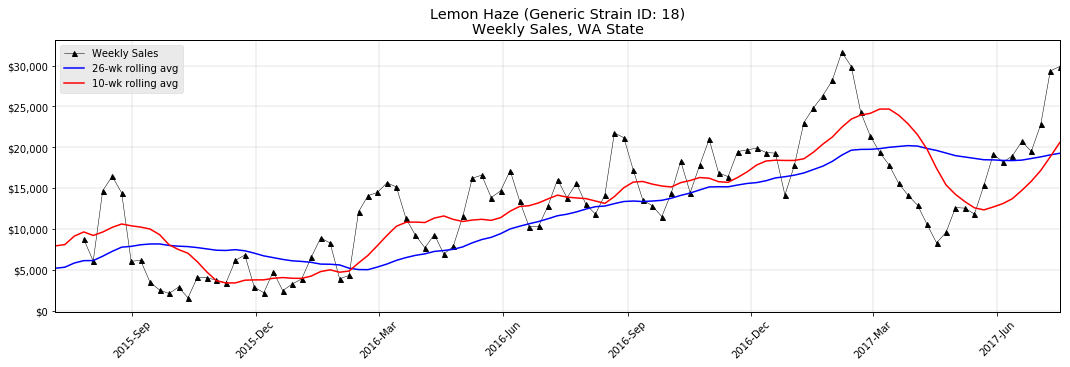

In [15]:
fig, ax = plt.subplots(figsize=(18, 5))

fmt_y = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt_y)
ax.plot(index, sales_wk[-107:-3], color='black', marker='^', ms=5, linewidth=0.5, label='Weekly Sales')
ax.plot(sales_wk.rolling(26).mean(), color='blue', label='26-wk rolling avg')
ax.plot(sales_wk.rolling(10).mean(), color='red', label='10-wk rolling avg')
ax.yaxis.set_major_formatter(tick)

ax.set_facecolor('white')
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.set_xlim(index.min() - 3, index.max())
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(colors='black')

ax.set_title('Lemon Haze (Generic Strain ID: 18)\nWeekly Sales, WA State')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [16]:
gorilla_sales_wk = gorilla_glue.sales_weekly
blue_cheese_wk = blue_cheese.sales_weekly
index = pd.to_datetime(sales_wk.index)

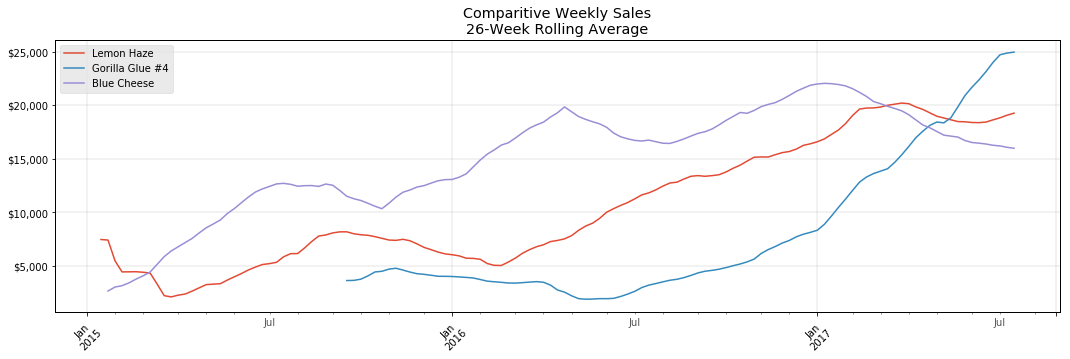

In [17]:
fig, ax = plt.subplots(figsize=(18, 5))

sales_wk[-159:-3].rolling(26).mean().plot(label='Lemon Haze')
gorilla_sales_wk[-159:-3].rolling(26).mean().plot(label="Gorilla Glue #4")
blue_cheese_wk[-159:-3].rolling(26).mean().plot(label='Blue Cheese')

fmt_y = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt_y)
ax.yaxis.set_major_formatter(tick)
ax.set_facecolor('white')
ax.grid(color='grey', linestyle='-', linewidth=0.2)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# ax.set_xlim(index.min() - 3, index.max())
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(colors='black')

ax.set_title('Comparitive Weekly Sales\n26-Week Rolling Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
sales_dy.to_csv('../data/lemon_haze_daily.csv')

In [20]:
sales_wk.to_csv('../data/lemon_haze_wkly.csv')

In [21]:
gorilla_sales_wk.to_csv('../data/gorilla_wkly.csv')
blue_cheese_wk.to_csv('../data/blue_cheese_wkly.csv')